In this colab, we will implement **multiclass MNIST digit recognition classifier** with **decision trees** and **ensemble techniques**.  

### Import basic libraries  

In [1]:
# plotting utility
import matplotlib.pyplot as plt

# dataset loading through mnist
from keras.datasets import mnist

# training three classifiers: decision tree, bagging and random forest. 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# model selection utilities for training and test split and cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# use shuffle-split cross validation for this exercise
from sklearn.model_selection import ShuffleSplit

# make use of confusion matrix and classification report to evaluate performance on the test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# the model is defined through pipeline utility
from sklearn.pipeline import Pipeline

## Loading MNIST dataset  

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(f"Shape of training data: {X_train.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of testing data: {X_test.shape}")
print(f"Shape of testing labels: {y_test.shape}")

Shape of training data: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of testing data: (10000, 28, 28)
Shape of testing labels: (10000,)


Before using the dataset for training and evaluation, we need to flatten it into a vector. After flattening, we have training and test examples represented with a vector of 784 features. Each feature records pixel intensity in each of 28*28 pixel.  

We normalize the pixel intensity by dividing it with maximum value i.e., 255. In that sense,we have each feature value in the range of 0 to 1.  

In [4]:
# Flatten each input image into a vector of length 784.  
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

# Normalizing
X_train = X_train/255
X_test = X_test/255

In [5]:
print(f"Shape of training data after flattening: {X_train.shape}")
print(f"Shape of testing data after flattening: {X_test.shape}")

Shape of training data after flattening: (60000, 784)
Shape of testing data after flattening: (10000, 784)


We use `ShuffleSplit` cross validation with 10 splits and 20% data set aside for model evaluation as a test data.  

In [6]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

We define two functions:  
1. `train_classifiers` contains a common code for training classifiers for MNIST multiclass classification problem.  
    * It take `estimator`, feature matrix, labels, cross validation strategy and name of the classifier as input.  
    * It first fits the estimator with feature matrix and labels. 
    * It obtains cross validated `f1_macro` score for training set with 10-fold `ShuffleSplit` cross validation and prints it.  

In [10]:
def train_classifiers(estimator, X_train, y_train, cv, name):
    estimator.fit(X_train, y_train)
    cv_train_score = cross_val_score(estimator, X_train, y_train,
                                        cv=cv, scoring='f1_macro')
    print(f"On an average, {name} model has f1 score of "
            f"{cv_train_score.mean():.3f} +/- {cv_train_score.std():.3f} on the training set.")

2. The `eval` function takes estimator, test feature matrix and labels as input and produce classification report and confusion matrix.  
    * It first predicts labels for the test set.  
    * Then it uses these predicted reports for calculating various evaluation metrics like precision, recall, f1 score and accuracy for each of the 10 classes.  
    * It also obtains a confusion matrix by comparing these predictions with the actual labels and displays it with `ConfusionMatrixDisplay` utility.  

In [14]:
def eval(estimator, X_test, y_test):
    y_pred = estimator.predict(X_test)

    print(f"# Classification report")
    print(classification_report(y_test, y_pred))

    print(f"# Confusion matrix")
    disp = ConfusionMatrixDisplay(
        confusion_matrix = confusion_matrix(y_test, y_pred))
    disp.plot()
    plt.title('Confusion matrix')
    plt.show()

Let's train three classifiers with default parameters.  
* Decision tree  
* Bagging classifier  
* Random forest classifier  

## Decision trees for MNIST multiclass classification  

We instantiate a decision tree classifier with default parameters and train it. The `train_classifier` function prints mean of cross validated accuracy and standard deviation of the trained classifier on the training set.  

In [12]:
decision_tree_pipeline = Pipeline([('classifier', DecisionTreeClassifier())])
train_classifiers(decision_tree_pipeline, X_train, y_train.ravel(), cv, "decision tree")

On an average, decision tree model has f1 score of 0.868 +/- 0.003 on the training set.


Let's evaluate the trained classifer on the test set.  

# Classification report
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.87      0.84      0.86      1032
           3       0.82      0.86      0.84      1010
           4       0.87      0.87      0.87       982
           5       0.84      0.83      0.84       892
           6       0.89      0.89      0.89       958
           7       0.91      0.90      0.91      1028
           8       0.83      0.81      0.82       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000

# Confusion matrix


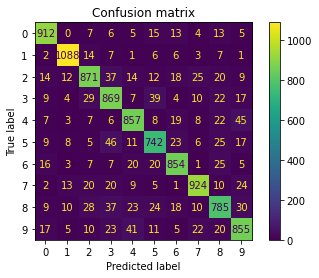

In [15]:
eval(decision_tree_pipeline, X_test, y_test)

## MNIST classification with Bagging  

In [16]:
bagging_pipeline = Pipeline([('classifier', BaggingClassifier())])
train_classifiers(bagging_pipeline, X_train, y_train.ravel(), cv, 'bagging')

On an average, bagging model has f1 score of 0.937 +/- 0.004 on the training set.


Let's evaluate the trainied classifier on the test set.  

# Classification report
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.92      0.94      0.93      1032
           3       0.93      0.93      0.93      1010
           4       0.94      0.95      0.94       982
           5       0.93      0.92      0.93       892
           6       0.96      0.96      0.96       958
           7       0.96      0.95      0.95      1028
           8       0.93      0.91      0.92       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

# Confusion matrix


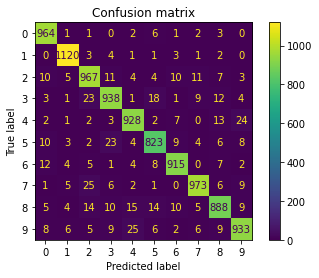

In [17]:
eval(bagging_pipeline, X_test, y_test)

## Random forest for MNIST multiclass classification  

In [18]:
random_forest_pipeline = Pipeline([('classifer', RandomForestClassifier())])
train_classifiers(random_forest_pipeline, X_train, y_train.ravel(), cv,
                    'random forest')

KeyboardInterrupt: 

Let's evaluate the trainied classifier on the test set.  

In [ ]:
eval(random_forest_pipeline, X_test, y_test)

## Summary  

* We trained three multiclass classifiers for handwritten digit recognition.  
* The decision tree classifier is a baseline classifier, which obtained accuracy of 88% on the test set.  
* Using bagging and training the same decision tree classifier gave us an increase of 6% point in the accuracy, which translates to 94% accuracy on the test set.  
* Finally, random forest pushed that further to 97%.  
* We can see that how ensemble techniques give better results on the classifier task compared to a single classifier.  
* With this demonstration, you have three more powerful tools in your ML toofkit.  